### Honey Berk, DATA 620 - HW6

In [180]:
#!/usr/bin/env python
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).
"""
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']

In [181]:
# Number of nodes and edges
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print 'There are %s nodes and %s edges in the Davis Club network.' % (G_nodes, G_edges)

There are 32 nodes and 89 edges in the Davis Club network.


In [182]:
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G,women,events))

#### Plot as a one-mode network.

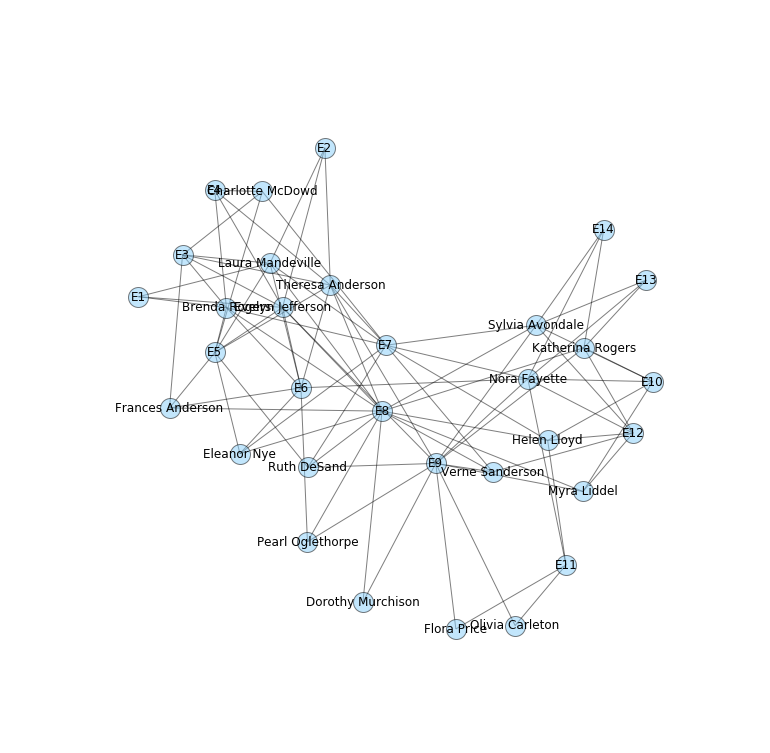

In [183]:
plt.figure(figsize=(10,10))
pos=nx.drawing.spring_layout(G)
nx.draw(G,node_size=400,node_color='lightskyblue',with_labels=True,alpha=0.5)

#### Project bipartite graph onto women nodes, first unweighted and then weighted by number of co-occurences.

In [184]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [185]:
# project bipartite graph onto club nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend Meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))


#Friend Meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


#### Plot projected "women" network with edge weights. We can see that this network is highly centralized and closed. As evidenced by the graph below and the table above: there are a few outliers, women who have a very high ( > 45) or low ( < 30) number of shared contacts, but most seem to be clustered between those values. This is interesting, in light of the fact that most of the women have 15-17 friends, but their shared networks are much more varied.

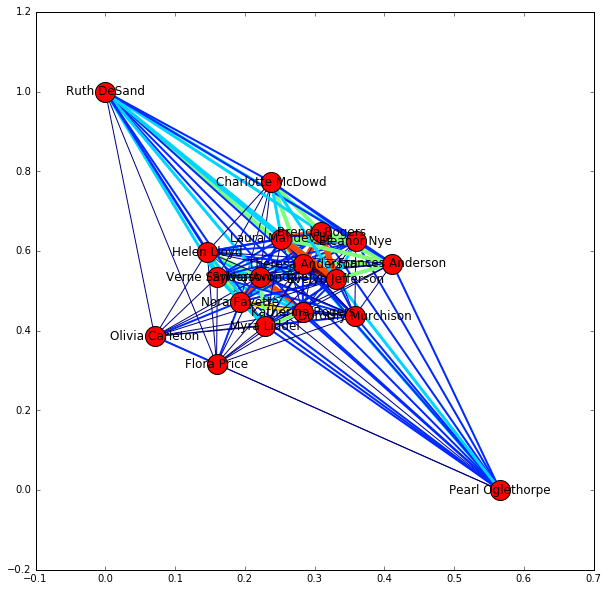

In [186]:
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, node_size = 400, edge_color=weights, with_labels=True)

#### Project bipartite graph onto event nodes, weighted by number of co-occurences.

In [187]:
# project bipartite graph onto event nodes keeping number of co-occurence
# the degree computed is weighted and counts the shared attendance
C = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#Shared Attendance, Event")
for c in clubs:
    print('%d %s' % (C.degree(c,weight='weight'),c))


#Shared Attendance, Event
19 E1
20 E2
32 E3
23 E4
38 E5
41 E6
48 E7
59 E8
46 E9
25 E10
13 E11
28 E12
18 E13
18 E14


#### From the graph below and table above, we can see that events E7, E8 and E9 were co-attended by the most women. There are some outliers, events that were attended by a very high or very low number of women.

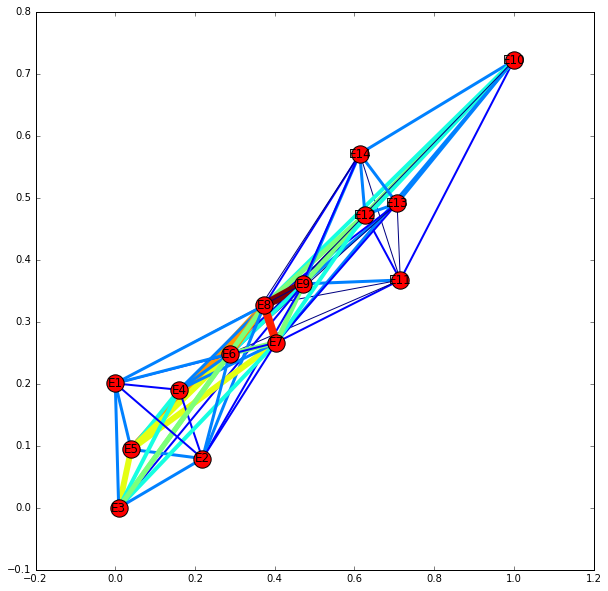

In [188]:
weights = [edata['weight'] for f,t,edata in C.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(C, width=weights, edge_color=weights, with_labels=True)

#### In the table below, we can see that there are seven women with the highest degree, 17, and resulting degree centrality and betweenness centrality. As such, none of the women in the club play a star role, acting as a crucial boundary spanner within the network.

In [189]:
ebcent=nx.edge_betweenness_centrality(C)
ebcent_s=sorted(dcent.iteritems(),key=lambda(u,v):(-v,u))

names1=[x[0] for x in dcent_s]
names2=[x[0] for x in bcent_s]
names=list(set(names1)|set(names2))

table=[[name,W.degree(name),round(dcent[name],4),round(bcent[name],4)] for name in names]

table=sorted(table,key=lambda x: -x[2])
pt = PrettyTable(['Node','Degree','Degree Centrality', 'Betweenness Centrality'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt

+-------------------+--------+-------------------+------------------------+
|        Node       | Degree | Degree Centrality | Betweenness Centrality |
+-------------------+--------+-------------------+------------------------+
|  Theresa Anderson |   17   |        1.0        |         0.0101         |
|    Nora Fayette   |   17   |        1.0        |         0.0101         |
|  Verne Sanderson  |   17   |        1.0        |         0.0101         |
|  Evelyn Jefferson |   17   |        1.0        |         0.0101         |
|    Ruth DeSand    |   17   |        1.0        |         0.0101         |
|    Helen Lloyd    |   17   |        1.0        |         0.0101         |
|  Sylvia Avondale  |   17   |        1.0        |         0.0101         |
|  Pearl Oglethorpe |   16   |       0.9412      |         0.0053         |
|  Katherina Rogers |   16   |       0.9412      |         0.0053         |
| Dorothy Murchison |   16   |       0.9412      |         0.0053         |
|    Myra Li

#### Looking at one final metric, we see that the three women with the lowest number of shared connections have the highest clustering coefficient; this seems to point to the fact that their subnetwork is very closed -- perhaps representing a clique. The same can be said about the other sets of women in the table, but to lesser degrees as the clustering coefficient decreases.

In [190]:
wclust=nx.clustering(W)
wclust_s=sorted(wclust.iteritems(),key=lambda(u,v):(-v,u))

names4=[x[0] for x in wclust_s]
names=list(set(names4))

table=[[name,round(wclust[name], 4)] for name in names]

table=sorted(table,key=lambda x: -x[1])
pt = PrettyTable(['Node', 'Clustering Coefficient'])
for i in range(0, len(table)):
    pt.add_row(table[i])
    
print pt

+-------------------+------------------------+
|        Node       | Clustering Coefficient |
+-------------------+------------------------+
|    Flora Price    |          1.0           |
|  Olivia Carleton  |          1.0           |
|  Charlotte McDowd |          1.0           |
|   Brenda Rogers   |         0.9619         |
|    Eleanor Nye    |         0.9619         |
|  Frances Anderson |         0.9619         |
|  Laura Mandeville |         0.9619         |
|  Pearl Oglethorpe |         0.9333         |
|  Katherina Rogers |         0.9333         |
|    Myra Liddel    |         0.9333         |
| Dorothy Murchison |         0.9333         |
|  Theresa Anderson |         0.8971         |
|    Nora Fayette   |         0.8971         |
|  Sylvia Avondale  |         0.8971         |
|    Ruth DeSand    |         0.8971         |
|  Evelyn Jefferson |         0.8971         |
|  Verne Sanderson  |         0.8971         |
|    Helen Lloyd    |         0.8971         |
+------------